## 1. Problem Statement

Design a predictive model with the use of machine learning algorithms to predict the charges of a medical insurance

## 2. Data Source

The dataset is downloaded from Kaggle

## 3. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno


In [2]:
# Load dataset
df = pd.read_csv('Train_Data.csv')
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


## 4. Data Preprocessing

In [3]:
# Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [4]:
df.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
age,3630.0,38.887036,12.151029,18.0000,29.000000,39.170922,48.343281,64.00000
bmi,3630.0,30.629652,5.441307,15.9600,26.694526,30.200000,34.100000,53.13000
children,3630.0,2.503581,1.712568,0.0000,1.000000,3.000000,4.000000,5.00000
charges,3630.0,12784.808644,10746.166743,1121.8739,5654.818262,9443.807222,14680.407505,63770.42801


In [5]:
df.describe(include=[object]).T

,count,unique,top,freq
sex,3630,2,male,2029
smoker,3630,2,no,3070
region,3630,4,southeast,1021


## 5. Finding Categorical and Numerical Features in a Dataset

In [6]:
# Categorical features
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print(f"Number of Categorical Features : {len(categorical_features)}")
print(f"Categorical Features : {categorical_features}")

Number of Categorical Features : 3
Categorical Features : ['sex', 'smoker', 'region']


In [7]:
# Numerical Features
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print(f"Number of Numerical Features : {len(numerical_features)}")
print(f"Numerical Features : {numerical_features}")

Number of Numerical Features : 4
Numerical Features : ['age', 'bmi', 'children', 'charges']


## 6. Cardinality(no of unique values in the each categorical ) check for Categorical features:

In [8]:
for each_feature in categorical_features:
    unique_values = len(df[each_feature].unique())
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of sex are: 2
Cardinality(no. of unique values) of smoker are: 2
Cardinality(no. of unique values) of region are: 4


No high cardinality features found in the categorical features

## 7. Handling Missing Values

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64


<AxesSubplot:>

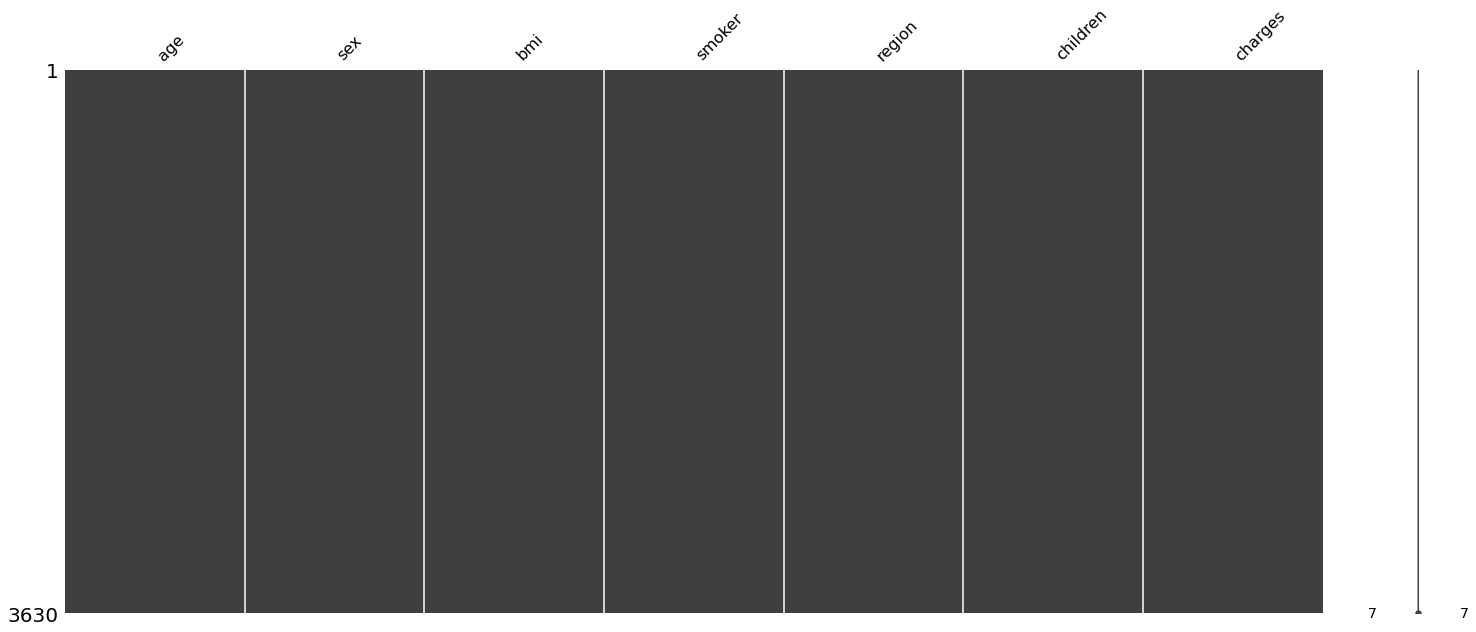

In [9]:
print(df.isna().sum())
missingno.matrix(df)

## 8. Exploratory Data Analysis

C:\Users\prvzs\miniconda3\envs\medical_insurance\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

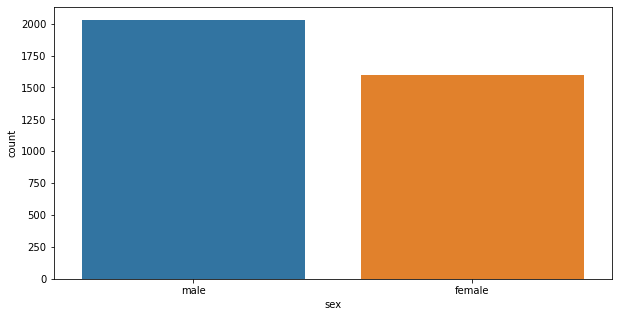

In [10]:
plt.figure(figsize=(10,5))
sns.countplot('sex',data=df)


<AxesSubplot:xlabel='age', ylabel='charges'>

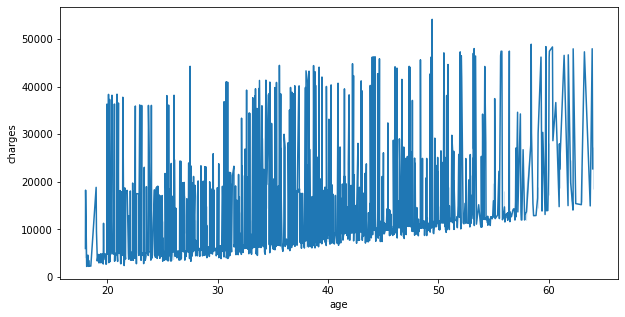

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(x='age',y='charges',data=df)

<AxesSubplot:xlabel='charges', ylabel='Count'>

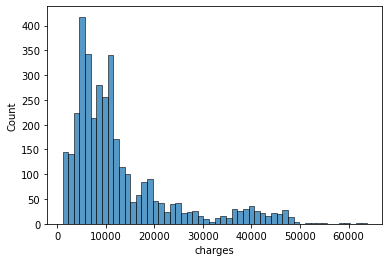

In [12]:
sns.histplot(x='charges',data=df)

<AxesSubplot:xlabel='charges', ylabel='bmi'>

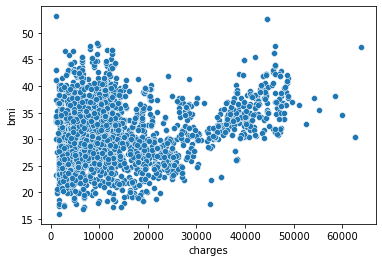

In [13]:
sns.scatterplot(x='charges',y='bmi',data=df)

Text(0, 0.5, 'BMI')

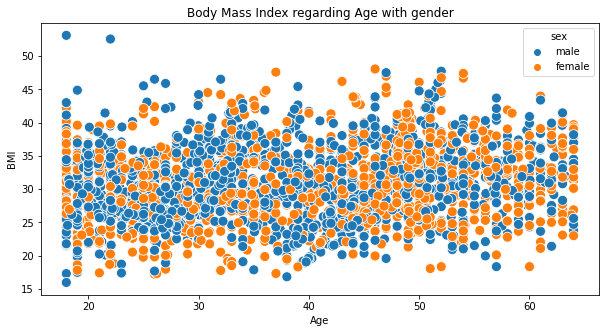

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age',y='bmi',hue='sex',data=df,s=100)
plt.title("Body Mass Index regarding Age with gender")
plt.xlabel("Age")
plt.ylabel("BMI")

Text(0, 0.5, 'BMI')

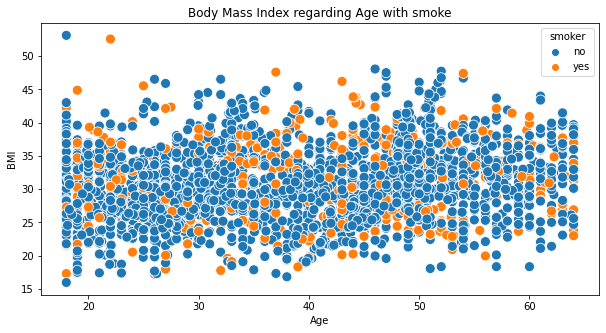

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age',y='bmi',hue='smoker',data=df,s=100)
plt.title("Body Mass Index regarding Age with smoke")
plt.xlabel("Age")
plt.ylabel("BMI")

## 10. Encoding of Categorical Features:

In [16]:
categorical_features

['sex', 'smoker', 'region']

In [17]:
df.smoker.value_counts()

no     3070
yes     560
Name: smoker, dtype: int64

In [18]:
df.region.value_counts()

southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64

In [19]:
df['sex'].replace({'male':1,'female':0},inplace=True)

In [20]:
df['smoker'].replace({'no':0,'yes':1},inplace=True)

In [21]:
df['region'].replace({'northeast':1,'southwest':2,'northwest':3,'southeast':4},inplace=True)

In [22]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,0,1,2,3279.868550
1,36.976978,0,25.744165,1,4,3,21454.494239
2,18.000000,1,30.030000,0,4,1,1720.353700
3,37.000000,1,30.676891,0,1,3,6801.437542
4,58.000000,1,32.010000,0,4,1,11946.625900


## 11.Correlation

<AxesSubplot:>

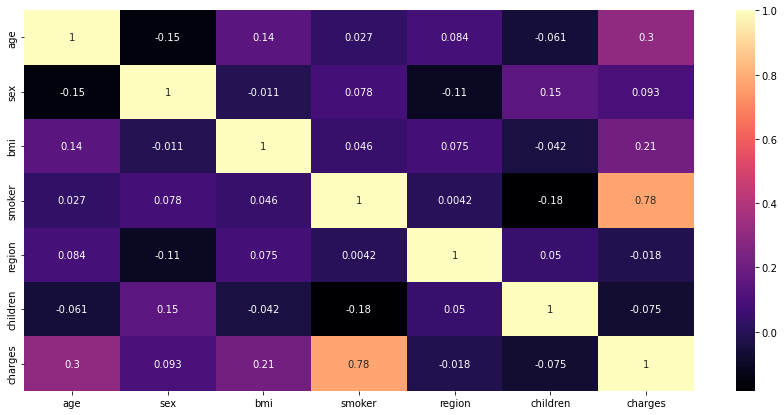

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),
           annot=True,
           cmap='magma')

In [24]:
# independent features and labels
X = df.drop('charges',axis=1)
y = df['charges']


## 12. Feature Importance

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
model.feature_importances_

array([0.11557028, 0.01147394, 0.16023623, 0.60449117, 0.04355607,
       0.06467232])

In [26]:
feature_importance = dict(zip(df.columns,model.feature_importances_))
feature_importance 

{'age': 0.11557027574680542,
 'sex': 0.01147393711694377,
 'bmi': 0.16023623244214544,
 'smoker': 0.6044911684423264,
 'region': 0.04355606827522382,
 'children': 0.06467231797655501}

<AxesSubplot:>

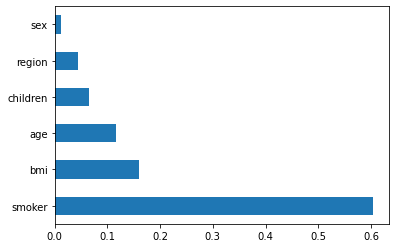

In [27]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

## 13. Splittting Data into Training and Testing set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [31]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 2904
Length of Testing Data: 726


## 14. Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 15. Modelling

In [39]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
random_forest.score(X_test,y_test)

0.9005668185903308

In [40]:
from sklearn.linear_model import ElasticNet
np.random.seed(42)
elastic_net =ElasticNet()
elastic_net.fit(X_train,y_train)
elastic_net.score(X_test,y_test)

0.6235348752510674

In [43]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
decision_tree.score(X_test,y_test)

0.8322398176155024

In [44]:
!pip install catboost

  Using cached catboost-1.0.3-cp39-none-win_amd64.whl (77.3 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [47]:
from catboost import CatBoostRegressor
np.random.seed(42)
cat = CatBoostRegressor(verbose=0)
cat.fit(X_train,y_train)
cat.score(X_test,y_test)


0.8914497328163684

In [46]:
!pip install xgboost

In [48]:
from xgboost import XGBRegressor
np.random.seed(42)
xgb = XGBRegressor(verbsoe=0)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

[17:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbsoe" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.8824278370946332

In [50]:
# Cross validation for best performing model
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_validation = cross_val_score(random_forest,X,y,cv=5)
cross_validation = np.mean(cross_validation)
cross_validation

0.901811900939552

## 16. Evaulation Metrics

In [57]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# y_predictions
y_pred = random_forest.predict(X_test)
y_pred

print(f"R^2 Score: {r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test,y_pred)}")

R^2 Score: 0.9005668185903308
Mean Absolute Error : 1507.0268910965688
Mean Squared Error : 11456057.388816936


In [62]:

df2 = pd.DataFrame(data={"actual":y_test,
                        "predicted":y_pred})
df2['MAE'] = df2['actual'] - df2['predicted']
df2['MSE'] = np.square(df2['MAE'])
df2

,actual,predicted,MAE,MSE
693,11023.443506,11167.469195,-144.025690,2.074340e+04
3220,6999.274662,6989.956088,9.318574,8.683581e+01
432,1986.933400,2227.088122,-240.154722,5.767429e+04
183,12927.131694,15427.549192,-2500.417498,6.252088e+06
2620,17500.205729,18143.191552,-642.985823,4.134308e+05
...,...,...,...,...
1378,3161.454000,3725.316524,-563.862524,3.179409e+05
2771,22412.648500,25764.356525,-3351.708025,1.123395e+07
2973,19071.287561,19205.501107,-134.213546,1.801328e+04
2493,4853.658249,4856.159946,-2.501697,6.258486e+00


## 17. Hyperparameter Tunining

In [51]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'n_estimators': [120,300,500,800,1200],
                     "max_depth" : [5,8,15,25,30,None],
                     "min_samples_split" : [1,2,5,10,15,100],
                     "min_samples_leaf":[1,2,5,10],
                     "max_features": ["log2","sqrt",None]}

# Randomized SerachCV
ideal_model = RandomizedSearchCV(estimator=random_forest,
                                param_distributions = param_distributions,
                                n_iter=10,
                                cv=5,
                                verbose=2)
ideal_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=100, n_estimators=120; total time=   0.5s
[CV] END max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=100, n_estimators=120; total time=   0.3s
[CV] END max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=100

C:\Users\prvzs\miniconda3\envs\medical_insurance\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prvzs\miniconda3\envs\medical_insurance\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prvzs\miniconda3\envs\medical_insurance\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\prvzs\miniconda3\envs\medical_insurance\lib\site-packages\joblib\parallel.py", line 1043, in __call__

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 8, 15, 25, 30, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [120, 300, 500, 800,
                                                         1200]},
                   verbose=2)

In [54]:
ideal_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 30}

In [55]:
ideal_model.score(X_test,y_test)

0.9002917023527335

## 18. Saving a model

In [63]:
import pickle

# saving existing model to file
pickle.dump(random_forest,open('random_forest.pkl','wb'))


In [64]:
# Load saved model
loaded_model = pickle.load(open('random_forest.pkl','rb'))
loaded_model

RandomForestRegressor()

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'children', 'charges'], dtype='object')

In [70]:
# make prediction using loaded_model
pred = loaded_model.predict(X_test)
pred

array([11167.46919541,  6989.95608829,  2227.088122  , 15427.54919196,
       18143.19155221,  9645.50757226,  6616.59386106,  9181.88894183,
       14371.7832249 ,  5378.58839127,  9110.12181907, 20061.08278514,
        6512.52381209,  5347.53908343,  9707.60606693, 14697.65598544,
        6377.21685196,  2116.6789456 , 11362.0239693 ,  5642.40519576,
        7018.3199495 , 28477.3118735 , 11162.40940019,  5595.61954506,
        4835.29330739, 39951.56462106,  5500.47076137, 11027.1069151 ,
        3625.33798692, 12219.14234312,  6524.32449502, 18073.52751704,
        9571.19811206, 12288.74650671,  4435.8018461 ,  5680.24870996,
        6348.89821294,  4396.04702651,  7612.21422061,  2314.9043572 ,
       39756.25838812,  8847.44663269,  5135.8255731 ,  5394.9985614 ,
       12101.28393118,  9009.10356193,  4831.47446755,  5096.45297359,
        9867.72364473,  7964.5257107 , 41562.98651542, 12201.38416182,
       46220.71720128, 23600.54836368,  9949.57428865,  4924.71520646,
      